In [3]:
# 1. Проведите первичную обработку данных. Так как данных много, 
# стоит написать функции, которые можно применять к столбцам определённого типа. 

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv.xls')

In [243]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [244]:
stud_math.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [245]:
#напишем функцию для расчета границы выбросов
IQR = 0
perc25 = 0
perc75 = 0
def outlier(column):
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
    IQR = perc75 - perc25
    f=perc25 - 1.5*IQR 
    l=perc75 + 1.5*IQR
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), 
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [246]:
#1 school — аббревиатура школы, в которой учится ученик
print("В датасете содержится информация про учеников {} школ.".format(stud_math.school.nunique()))
stud_math.school.value_counts()

В датасете содержится информация про учеников 2 школ.


GP    349
MS     46
Name: school, dtype: int64

In [247]:
#2 sex — пол ученика ('F' - женский, 'M' - мужской)
stud_math.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [248]:
#3 age — возраст ученика (от 15 до 22)
stud_math.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [249]:
outlier('age')
#убирать выброс (22 года - 1 ученик) не будем, т.к.наличие этого 
#выброса не повлияет на аккуратность результата модели

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

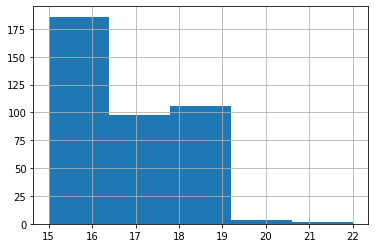

In [250]:
stud_math.age.hist(bins=5)
stud_math.age.describe()

In [251]:
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
display(pd.DataFrame(stud_math.address.value_counts()))
print(stud_math.address.isna().sum())

,address
U,295
R,83


17


In [252]:
#заменим пустые значения на наиболее частое значение - U
stud_math.address.fillna('U', inplace = True)
stud_math.address.value_counts()

U    312
R     83
Name: address, dtype: int64

In [253]:
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3
display(stud_math.famsize.value_counts())
print(stud_math.famsize.isna().sum())

GT3    261
LE3    107
Name: famsize, dtype: int64

27


In [254]:
#заменим пустые значения на наиболее частое значение - GT3
stud_math.famsize.fillna('GT3', inplace = True)
stud_math.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

In [255]:
# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
display(stud_math.Pstatus.value_counts())
print(stud_math.Pstatus.isna().sum())

T    314
A     36
Name: Pstatus, dtype: int64

45


In [256]:
#заменим пустые значения на наиболее частое значение - T
stud_math.Pstatus.fillna('T', inplace = True)
display(stud_math.Pstatus.value_counts())
print(stud_math.Pstatus.isna().sum())

T    359
A     36
Name: Pstatus, dtype: int64

0


In [257]:
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
#3 - среднее специальное или 11 классов, 4 - высшее)
display(stud_math.Medu.value_counts())
print(stud_math.Medu.isna().sum())

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

3


In [258]:
#заменим пропуски на медианное значение
print("Медиана = {}".format(stud_math.Medu.median()))
stud_math.Medu.fillna(stud_math.Medu.median(), inplace = True)
display(stud_math.Medu.value_counts())
print(stud_math.Medu.isna().sum())

Медиана = 3.0


4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64

0


count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

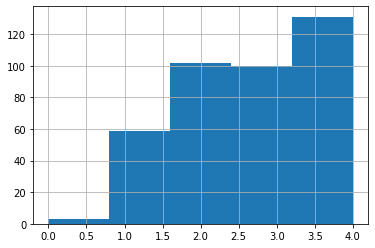

In [259]:
stud_math.Medu.hist(bins=5)
stud_math.Medu.describe()

In [260]:
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
# 3 - среднее специальное или 11 классов, 4 - высшее)
display(stud_math.Fedu.value_counts())
print(stud_math.Fedu.isna().sum())

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

24


In [261]:
#заменим пропуски на медианное значение
print("Медиана = {}".format(stud_math.Fedu.median()))
stud_math.Fedu.fillna(stud_math.Fedu.median(), inplace = True)
display(stud_math.Fedu.value_counts())
print(stud_math.Fedu.isna().sum())

Медиана = 2.0


2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

0


In [262]:
#заменим значение 40 на 4, т.к. это похоже на опечатку, 
#в описании обозначен диапазон доступных значений 0-4
stud_math.Fedu = stud_math.Fedu.apply(lambda x: float(str(x).replace('40', '4')))
display(stud_math.Fedu.value_counts())
print(stud_math.Fedu.isna().sum())

2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

0


count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

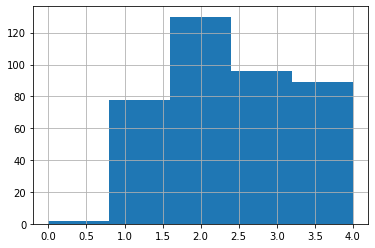

In [263]:
stud_math.Fedu.hist(bins=5)
stud_math.Fedu.describe()

In [264]:
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 
#'services' - гос служба, 'at_home' - не работает, 'other' - другое)
display(stud_math.Mjob.value_counts())
print(stud_math.Mjob.isna().sum())

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

19


In [265]:
#заменим пустые значения на наиболее частое значение - other
stud_math.Mjob.fillna('other', inplace = True)
display(stud_math.Mjob.value_counts())
print(stud_math.Mjob.isna().sum())

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

0


In [266]:
#удалим этот столбец из датасета, т.к.почти половина значений отмечена как other, 
#и для нашей модели столбец будет неинформативным
stud_math.pop('Mjob')

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 395, dtype: object

In [267]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [268]:
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 
#'services' - гос служба, 'at_home' - не работает, 'other' - другое)
display(stud_math.Fjob.value_counts())
print(stud_math.Fjob.isna().sum())

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

36


In [269]:
#удалим этот столбец из датасета, т.к. больше половины значений отмечены как other, 
#и для нашей модели столбец будет неинформативным
stud_math.pop('Fjob')

0       teacher
1         other
2         other
3           NaN
4         other
         ...   
390    services
391    services
392       other
393       other
394     at_home
Name: Fjob, Length: 395, dtype: object

In [270]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [271]:
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 
#'other' - другое)
display(stud_math.reason.value_counts())
print(stud_math.reason.isna().sum())

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

17


In [272]:
#заменим пустые значения на наиболее частое значение - course
stud_math.reason.fillna('course', inplace = True)
display(stud_math.reason.value_counts())
print(stud_math.reason.isna().sum())

course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

0


In [273]:
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
display(stud_math.guardian.value_counts())
print(stud_math.guardian.isna().sum())

mother    250
father     86
other      28
Name: guardian, dtype: int64

31


In [274]:
#заменим пустые значения на наиболее частое значение - mother
stud_math.guardian.fillna('mother', inplace = True)
display(stud_math.guardian.value_counts())
print(stud_math.guardian.isna().sum())

mother    281
father     86
other      28
Name: guardian, dtype: int64

0


In [289]:
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 
# 4 - >60 мин.)
display(stud_math.traveltime.value_counts())
print(stud_math.traveltime.isna().sum())

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

28


In [290]:
#заменим пропуски на наиболее частое значение - 1
stud_math.traveltime.fillna(1, inplace = True)
display(stud_math.traveltime.value_counts())
print(stud_math.traveltime.isna().sum())

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

0


count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

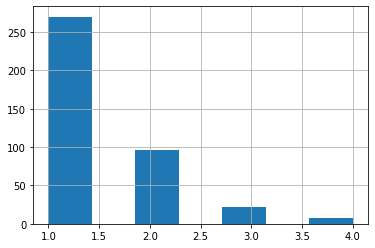

In [294]:
stud_math.traveltime.hist(bins=7)
stud_math.traveltime.describe()

In [295]:
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 
#3 - 5-10 часов, 4 - >10 часов)
display(stud_math.studytime.value_counts())
print(stud_math.studytime.isna().sum())

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

7


In [296]:
#заменим пропуски на наиболее частое значение - 2
stud_math.studytime.fillna(2, inplace = True)
display(stud_math.studytime.value_counts())
print(stud_math.studytime.isna().sum())

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

0


count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

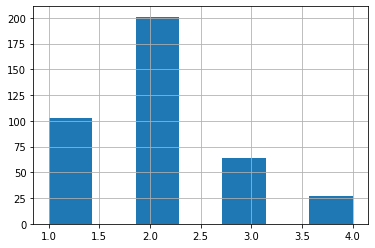

In [297]:
stud_math.studytime.hist(bins=7)
stud_math.studytime.describe()

In [299]:
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
display(stud_math.failures.value_counts())
print(stud_math.failures.isna().sum())

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

22


In [300]:
#заменим пропуски на наиболее частое значение - 0
stud_math.failures.fillna(0, inplace = True)
display(stud_math.failures.value_counts())
print(stud_math.failures.isna().sum())

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

0


count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

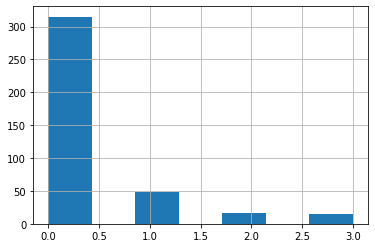

In [301]:
stud_math.failures.hist(bins=7)
stud_math.failures.describe()

In [303]:
# 16 schoolsup — дополнительная образовательная поддержка (yes или no)
display(stud_math.schoolsup.value_counts())
print(stud_math.schoolsup.isna().sum())

no     335
yes     51
Name: schoolsup, dtype: int64

9


In [307]:
#заменим пропуски на наиболее частое значение - no
stud_math.schoolsup.fillna('no', inplace = True)
display(stud_math.schoolsup.value_counts())
print(stud_math.schoolsup.isna().sum())

no     344
yes     51
Name: schoolsup, dtype: int64

0


In [308]:
#17 famsup — семейная образовательная поддержка (yes или no)
display(stud_math.famsup.value_counts())
print(stud_math.famsup.isna().sum())

yes    219
no     137
Name: famsup, dtype: int64

39


In [309]:
#заменим пропуски на наиболее частое значение - yes
stud_math.famsup.fillna('yes', inplace = True)
display(stud_math.famsup.value_counts())
print(stud_math.famsup.isna().sum())

yes    258
no     137
Name: famsup, dtype: int64

0


In [310]:
#18 paid — дополнительные платные занятия по математике (yes или no)
display(stud_math.paid.value_counts())
print(stud_math.paid.isna().sum())

no     200
yes    155
Name: paid, dtype: int64

40


In [314]:
#заменим пропуски на наиболее частое значение - no
stud_math.paid.fillna('no', inplace = True)
display(stud_math.paid.value_counts())
print(stud_math.paid.isna().sum())

no     240
yes    155
Name: paid, dtype: int64

0


In [315]:
#19 activities — дополнительные внеучебные занятия (yes или no)
display(stud_math.activities.value_counts())
print(stud_math.activities.isna().sum())

yes    195
no     186
Name: activities, dtype: int64

14


In [324]:
#т.к. значения распределены между yes и no почти равномерно, заменим пропуски 50/50
nan_list = stud_math[stud_math.activities.isna()].index
for i in range(2):
    for index in nan_list[i::2]:
        if i == 0:
            stud_math.at[index,7] = 'yes'
        else:
            stud_math.at[index,7] = 'no'
display(stud_math.activities.value_counts())

yes    195
no     186
Name: activities, dtype: int64

In [325]:
#20 nursery — посещал детский сад (yes или no)
display(stud_math.nursery.value_counts())
print(stud_math.nursery.isna().sum())

yes    300
no      79
Name: nursery, dtype: int64

16


In [326]:
#заменим пропуски на наиболее частое значение - yes
stud_math.nursery.fillna('yes', inplace = True)
display(stud_math.nursery.value_counts())
print(stud_math.nursery.isna().sum())

yes    316
no      79
Name: nursery, dtype: int64

0


In [394]:
#studytime, granular
display(stud_math['studytime, granular'].value_counts())
print(stud_math['studytime, granular'].isna().sum())

-6.0     189
-3.0     103
-9.0      63
-12.0     27
Name: studytime, granular, dtype: int64

7


In [397]:
#заменим пропуски на наиболее частое значение -6
stud_math['studytime, granular'].fillna(-6, inplace = True)
display(stud_math['studytime, granular'].value_counts())
print(stud_math['studytime, granular'].isna().sum())

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

0


count    395.000000
mean      -6.113924
std        2.503740
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

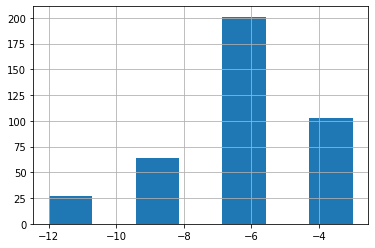

In [401]:
stud_math['studytime, granular'].hist(bins=7)
stud_math['studytime, granular'].describe()

In [327]:
#21 higher — хочет получить высшее образование (yes или no)
display(stud_math.higher.value_counts())
print(stud_math.higher.isna().sum())

yes    356
no      19
Name: higher, dtype: int64

20


In [329]:
#заменим пропуски на наиболее частое значение - yes
stud_math.higher.fillna('yes', inplace = True)
display(stud_math.higher.value_counts())
print(stud_math.higher.isna().sum())

yes    376
no      19
Name: higher, dtype: int64

0


In [330]:
#22 internet — наличие интернета дома (yes или no)
display(stud_math.internet.value_counts())
print(stud_math.internet.isna().sum())

yes    305
no      56
Name: internet, dtype: int64

34


In [331]:
#заменим пропуски на наиболее частое значение - yes
stud_math.internet.fillna('yes', inplace = True)
display(stud_math.internet.value_counts())
print(stud_math.internet.isna().sum())

yes    339
no      56
Name: internet, dtype: int64

0


In [332]:
#23 romantic — в романтических отношениях (yes или no)
display(stud_math.romantic.value_counts())
print(stud_math.romantic.isna().sum())

no     240
yes    124
Name: romantic, dtype: int64

31


In [335]:
#заменим пропуски на наиболее частое значение - no
stud_math.romantic.fillna('no', inplace = True)
display(stud_math.romantic.value_counts())
print(stud_math.romantic.isna().sum())

no     271
yes    124
Name: romantic, dtype: int64

0


In [336]:
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
display(stud_math.famrel.value_counts())
print(stud_math.famrel.isna().sum())

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

27


In [342]:
#заменим пропуски на наиболее частое значение - 4
stud_math.famrel.fillna(4, inplace = True)
display(stud_math.famrel.value_counts())
print(stud_math.famrel.isna().sum())

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

0


In [343]:
#удалим значение -1, т.к.это похоже на ошибку, в описании данных такого параметра нет
stud_math = stud_math[stud_math.famrel > 0]
display(stud_math.famrel.value_counts())
print(stud_math.famrel.isna().sum())

4.0    209
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

0


count    394.000000
mean       3.954315
std        0.860761
min        1.000000
25%        4.000000
50%        4.000000
75%        4.750000
max        5.000000
Name: famrel, dtype: float64

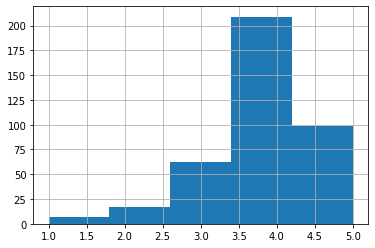

In [346]:
stud_math.famrel.hist(bins=5)
stud_math.famrel.describe()

In [347]:
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
display(stud_math.freetime.value_counts())
print(stud_math.freetime.isna().sum())

3.0    153
4.0    112
2.0     62
5.0     38
1.0     18
Name: freetime, dtype: int64

11


In [348]:
#заменим пропуски на наиболее частое значение - 3
stud_math.freetime.fillna(3, inplace = True)
display(stud_math.freetime.value_counts())
print(stud_math.freetime.isna().sum())

3.0    164
4.0    112
2.0     62
5.0     38
1.0     18
Name: freetime, dtype: int64

0


count    394.000000
mean       3.228426
std        0.980006
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

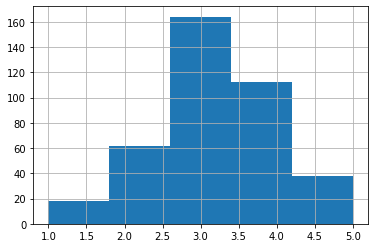

In [351]:
stud_math.freetime.hist(bins=5)
stud_math.freetime.describe()

In [352]:
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
display(stud_math.goout.value_counts())
print(stud_math.goout.isna().sum())

3.0    127
2.0    100
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

8


In [353]:
#заменим пропуски на наиболее частое значение - 3
stud_math.goout.fillna(3, inplace = True)
display(stud_math.goout.value_counts())
print(stud_math.goout.isna().sum())

3.0    135
2.0    100
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

0


count    394.000000
mean       3.106599
std        1.104608
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

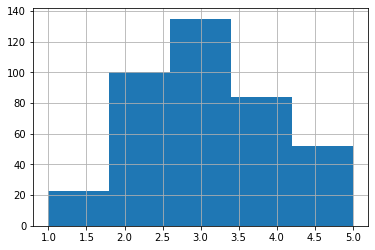

In [354]:
stud_math.goout.hist(bins=5)
stud_math.goout.describe()

In [355]:
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
display(stud_math.health.value_counts())
print(stud_math.health.isna().sum())

5.0    137
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

15


In [358]:
#заменим пропуски на наиболее частое значение - 5
stud_math.health.fillna(5, inplace = True)
display(stud_math.health.value_counts())
print(stud_math.health.isna().sum())

5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

0


count    395.000000
mean       3.587342
std        1.397729
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

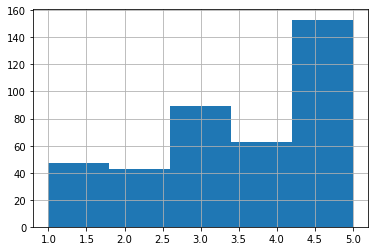

In [359]:
stud_math.health.hist(bins=5)
stud_math.health.describe()

In [362]:
#28 absences — количество пропущенных занятий
display(stud_math.absences.nunique())
display(stud_math.absences.median())
print(stud_math.absences.isna().sum())

36

4.0

12


In [379]:
#заменим пропуски на медианное значение

stud_math.absences.fillna(stud_math.absences.median(), inplace = True)
print(stud_math.health.isna().sum())

15


count    395.000000
mean       4.559494
std        4.781880
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

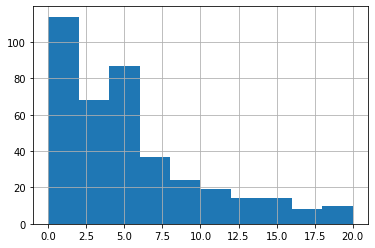

In [380]:
stud_math.absences.hist()
stud_math.absences.describe()

In [376]:
#проверим признак на наличие выбросов и уберем их
print(outlier('absences'))
stud_math.absences = stud_math.absences[stud_math.absences <= 20]

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
None


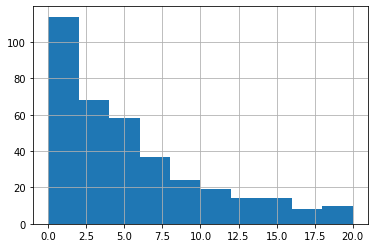

In [377]:
stud_math.absences.hist()

In [382]:
#29 score — баллы по госэкзамену по математике
display(stud_math.score.nunique())
print(stud_math.score.isna().sum())

18

6


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

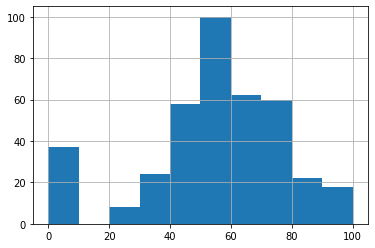

In [383]:
stud_math.score.hist()
stud_math.score.describe()

In [392]:
#удалим строки с пропущенными значениями, т.к.это наш результирующий признак
stud_math.dropna(subset=['score'], inplace=True)
print(stud_math.score.isna().sum())

0



Оцените количество уникальных значений для номинативных переменных.
По необходимости пребразуйте данные
Проведите корреляционный анализ количественных переменных
Отберите не коррелирующие переменные.
Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

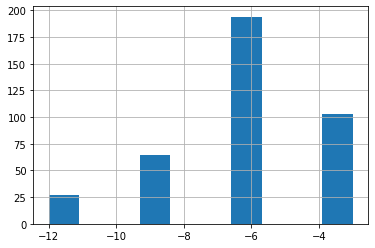

In [282]:
#studytime, granular
stud_math['studytime, granular'].hist()
stud_math['studytime, granular'].describe()

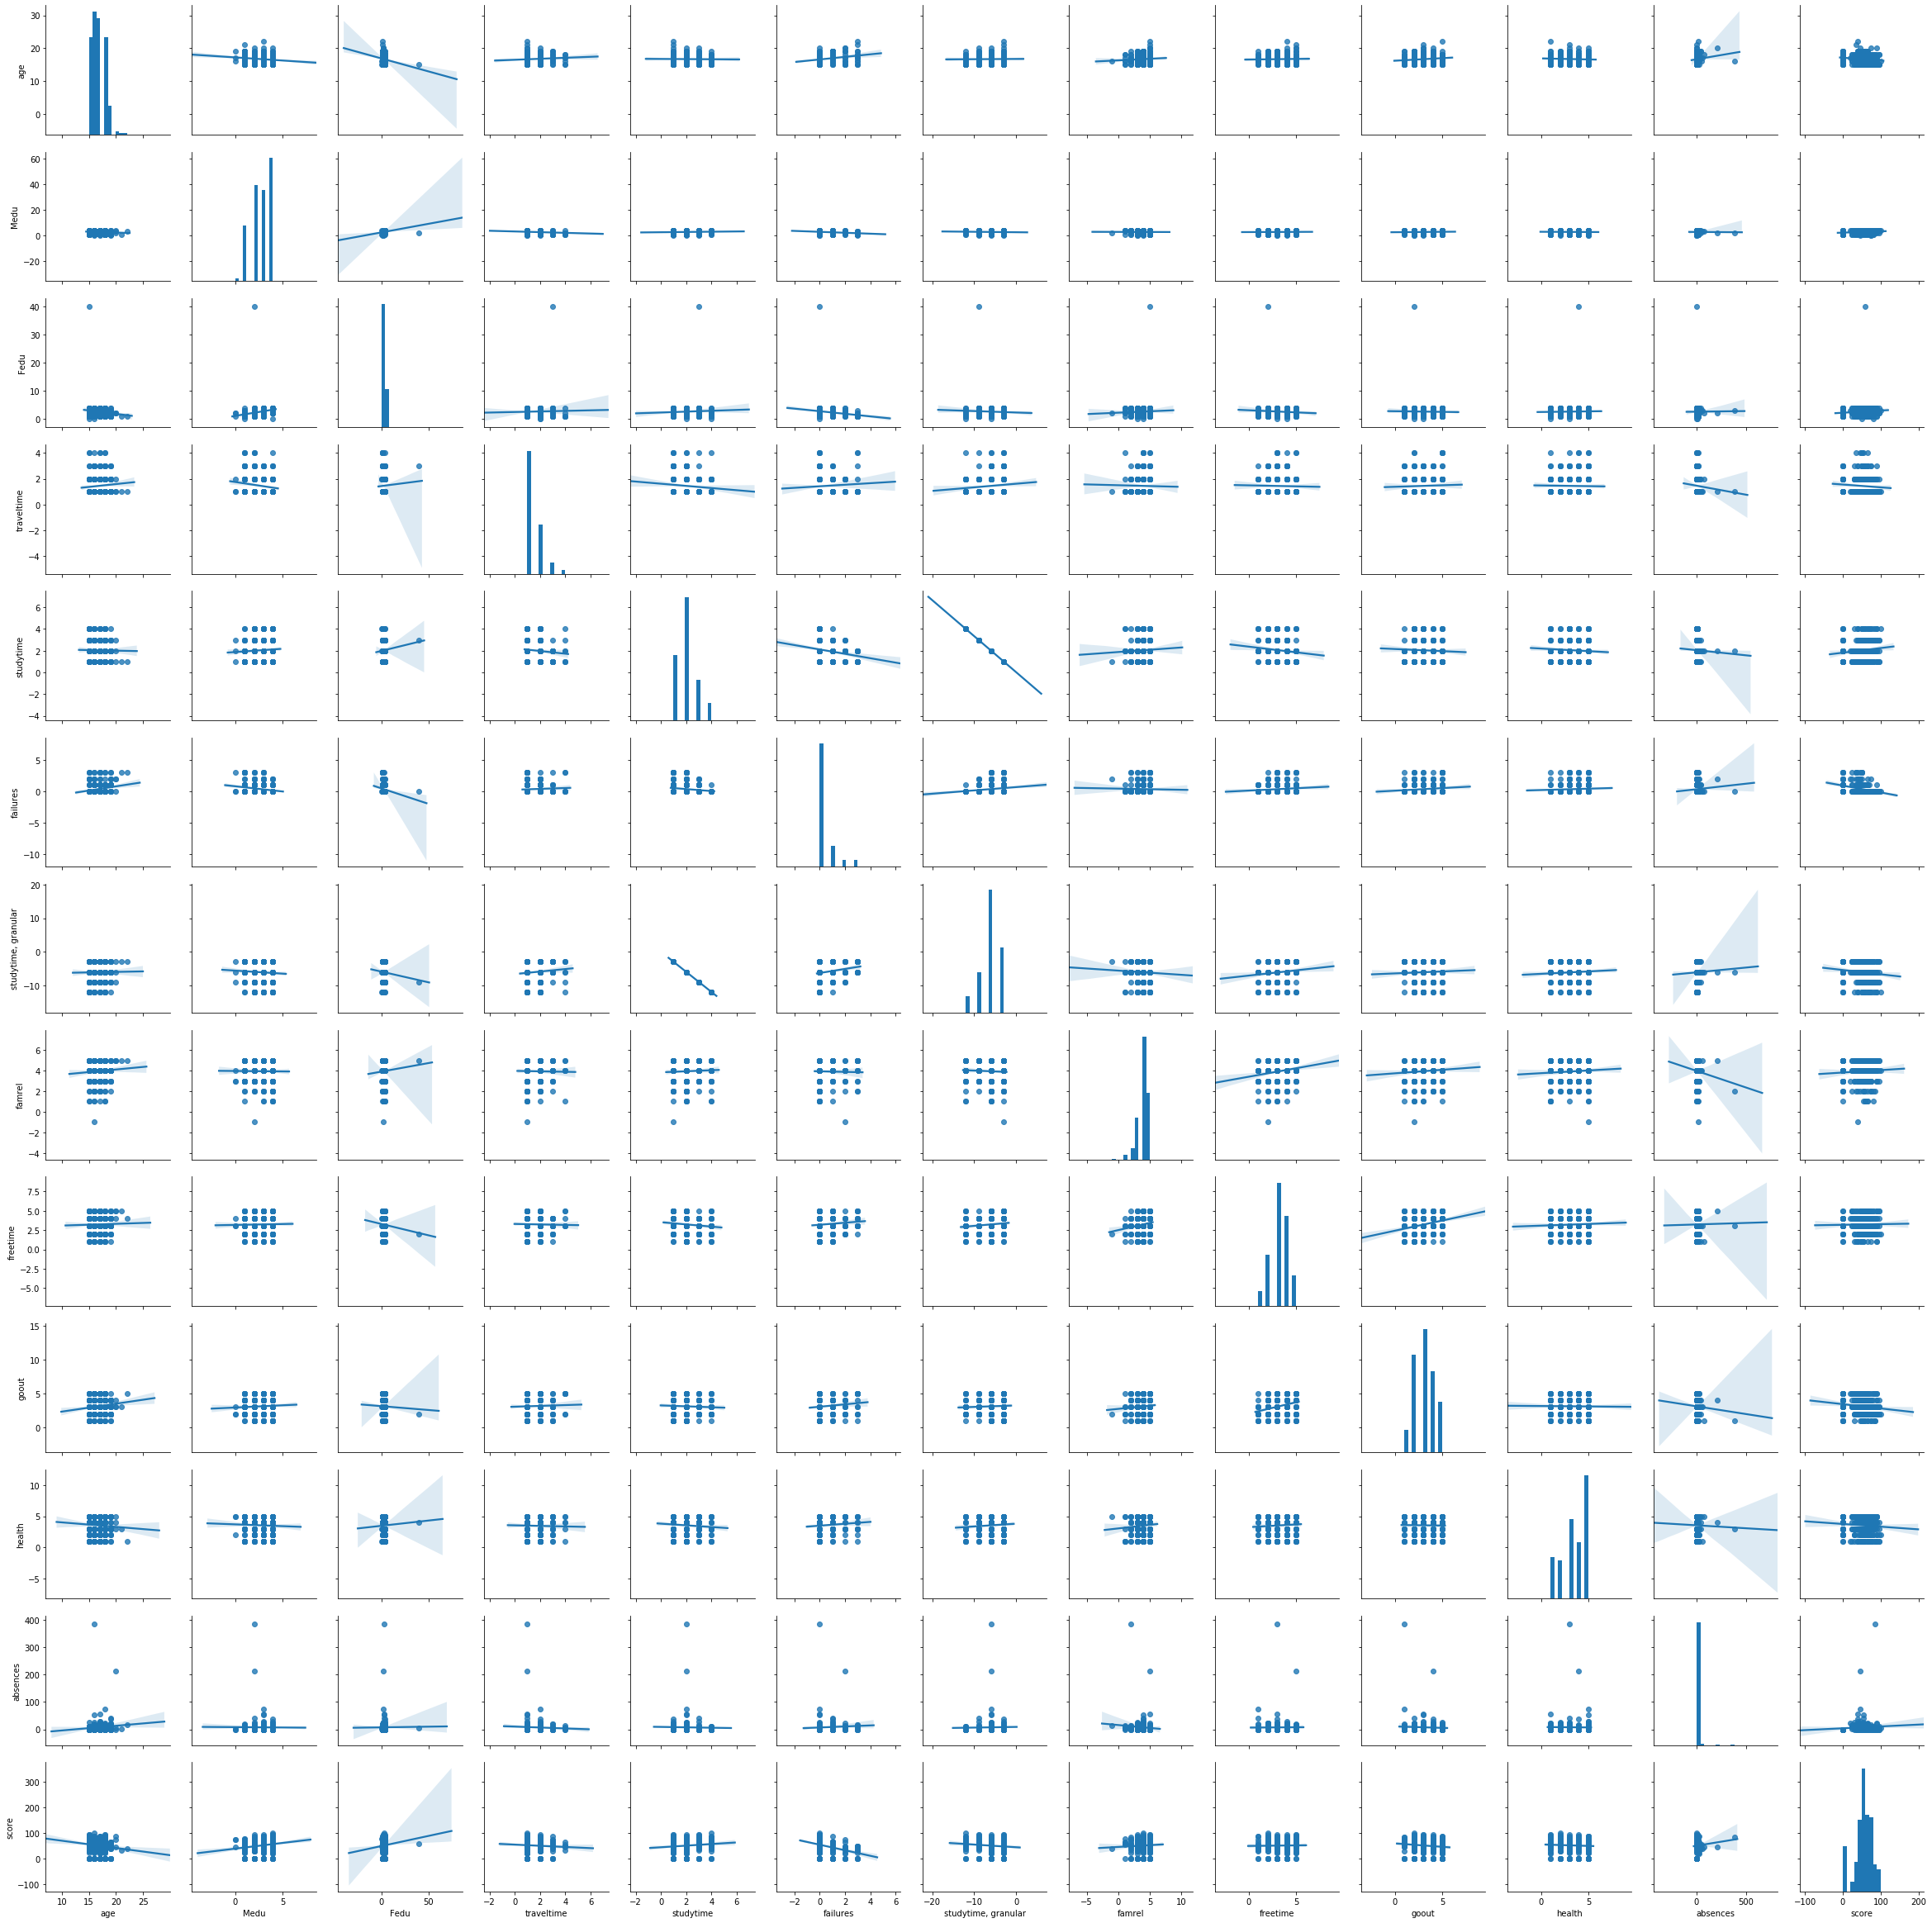

In [404]:
#Проанализируем корреляцию числовых столбцов
sns.pairplot(stud_math, kind = 'reg')

In [405]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [408]:
#удалим столбец studytime, granular, т.к.корреляция с studytime -1, 
#соответственно информация в них дублируется
stud_math.pop('studytime, granular')

0     -6.0
1     -6.0
2     -6.0
3     -9.0
4     -6.0
      ... 
390   -6.0
391   -3.0
392   -3.0
393   -3.0
394   -3.0
Name: studytime, granular, Length: 395, dtype: float64

In [412]:
"""также мы можем сделать вывод, что самое сильное положительное влияние на итоговую оценку
оказывают образование матери (Medu) и время учебы кроме школы (studytime).
а самое отрицательное влияние - количество внеучебных неудач (failures), возраст (age) и 
количество времени, проведенного с друзьями (goout).
это будут ключевые признаки нашей модели.
"""  

'также мы можем сделать вывод, что самое сильное положительное влияние на итоговую оценку\nоказывают образование матери (Medu) и время учебы кроме школы (studytime).\nа самое отрицательное влияние - количество внеучебных неудач (failures), возраст (age) и \nколичество времени, проведенного с друзьями (goout).\nэто будут ключевые признаки нашей модели.\n'

In [413]:
#Построим boxplot для номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

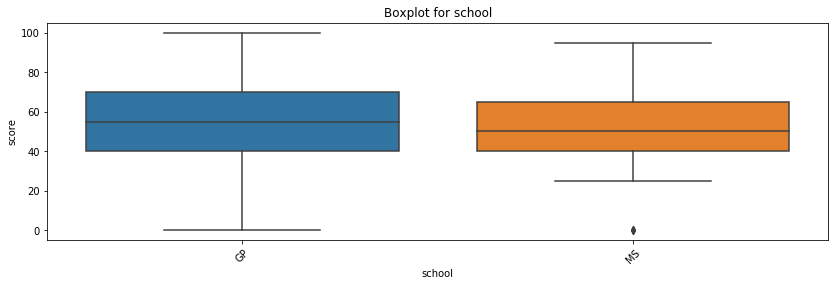

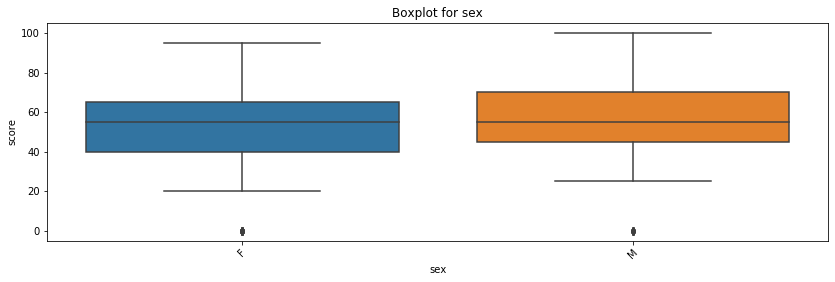

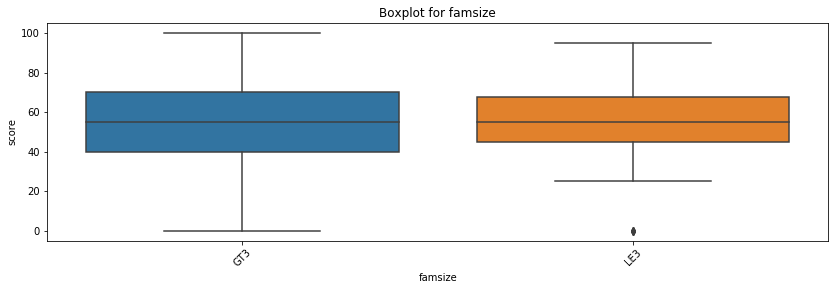

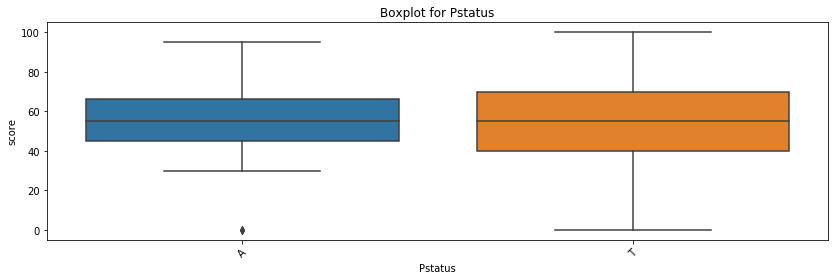

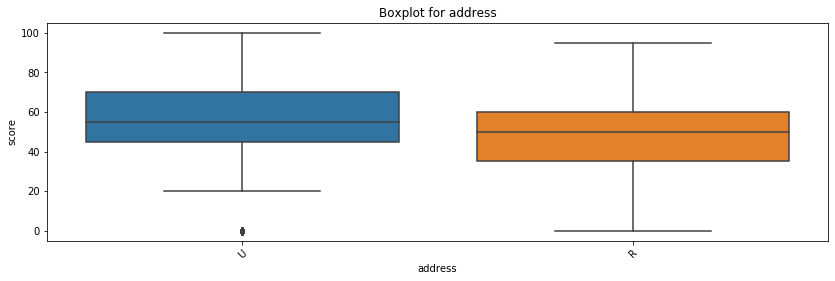

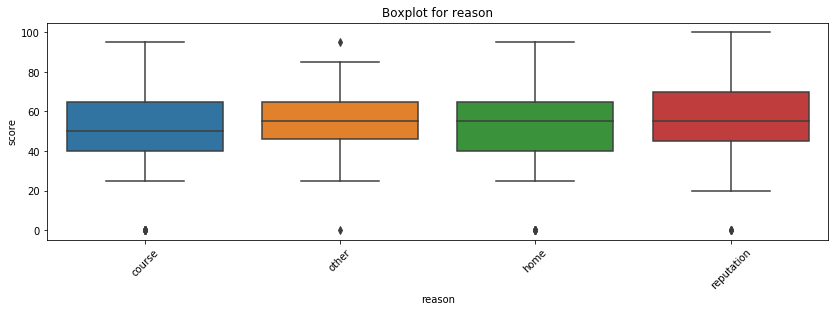

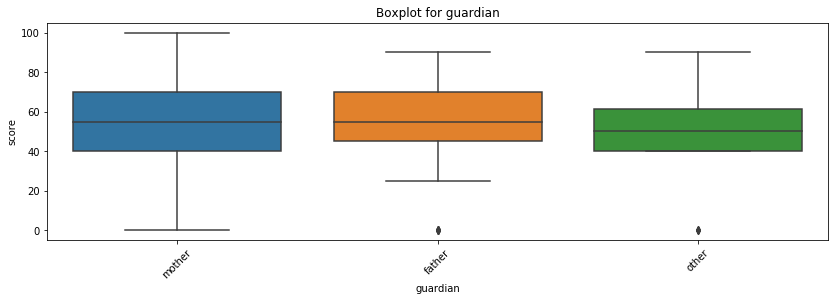

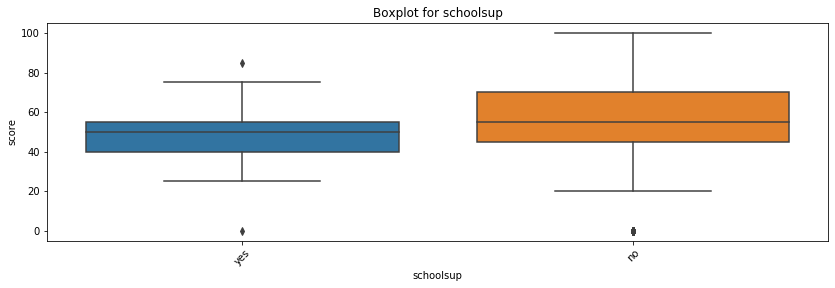

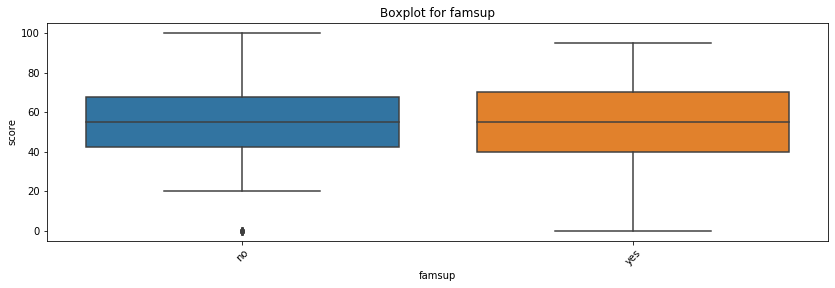

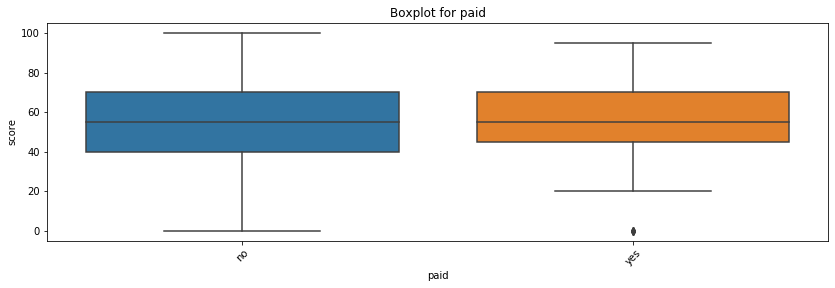

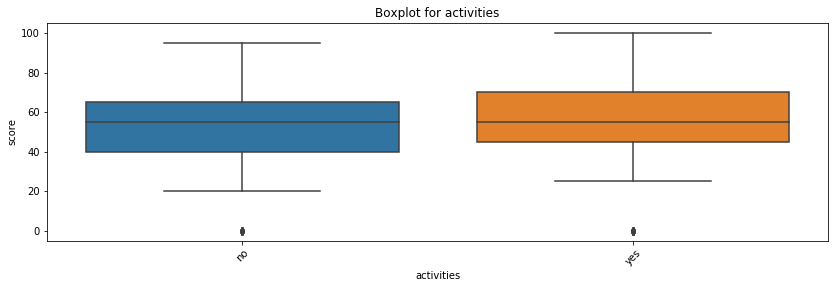

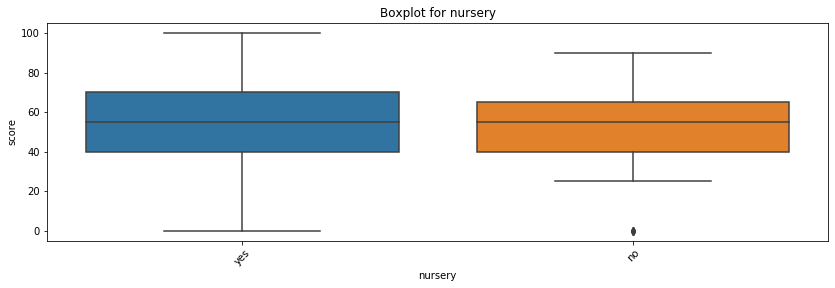

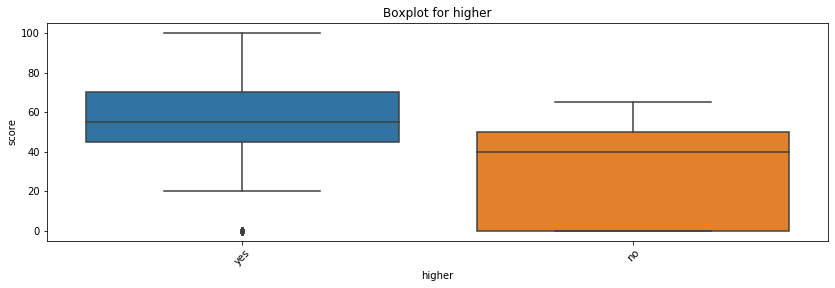

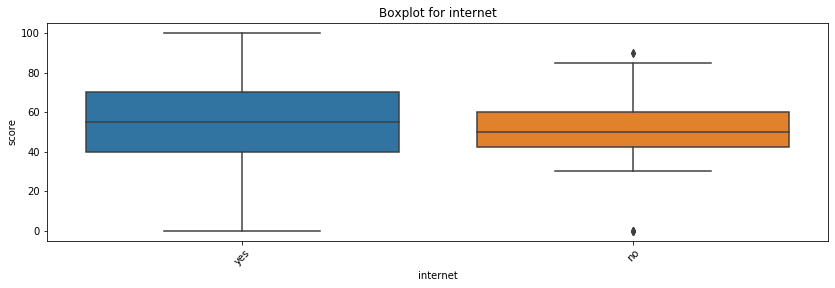

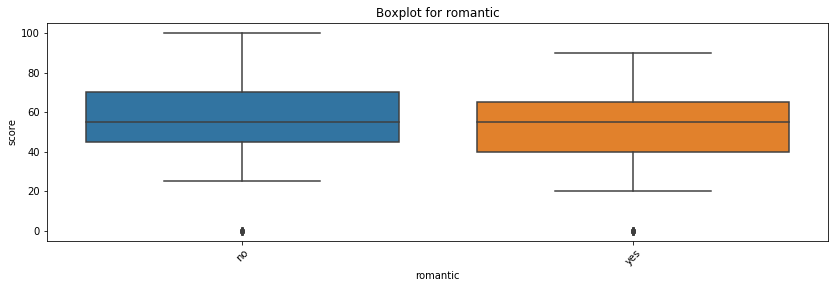

In [414]:
for col in ['school', 'sex', 'famsize', 'Pstatus', 'address', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
"""самое сильное влияние оказывает признак, характеризующий желание получить высшее 
образование (higher), наличие дополнительной образовательной поддержки (schoolsup) 
и область проживания - в городе или за городом (address).
Возьмем эти признаки в нашу модель."""